In [1]:
import numpy
from numpy import asarray, array, zeros
import json

In [2]:
import scipy.signal

In [3]:
import mpld3
import matplotlib.pyplot as plt
%matplotlib inline
mpld3.enable_notebook()

In [4]:
scipy.signal.butter(2, .1)

(array([ 0.02008337,  0.04016673,  0.02008337]),
 array([ 1.        , -1.56101808,  0.64135154]))

In [5]:
filepath = '../output.json'
with open(filepath, 'r') as f:
    js = json.load(f)
signal = asarray(js['signal'])
output = asarray(js['output'])

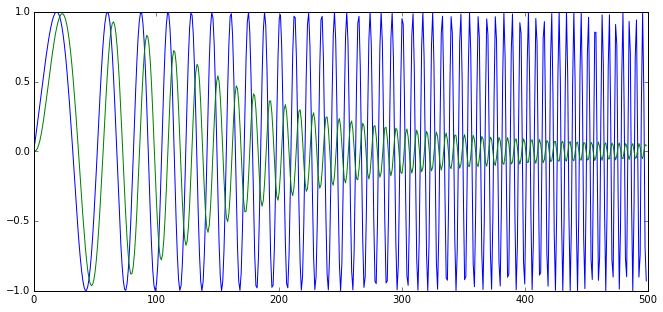

In [6]:
window = (0, 4000)
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
# ax.plot(signal[window[0]:window[1]])
# ax.plot(output[window[0]:window[1]])
ax.plot(signal)
ax.plot(output)
plt.show()

In [7]:
filepath = '../input.json'
with open(filepath, 'r') as f:
    js = json.load(f)
signal = asarray(js['signal'])
numerator = asarray(js['numerator'])
denominator = asarray(js['denominator'])

In [8]:
denominator, numerator

(array([ 1.        , -1.56101808,  0.64135154]),
 array([ 0.02008337,  0.04016673,  0.02008337]))

In [9]:
output = scipy.signal.lfilter(numerator, denominator, signal)

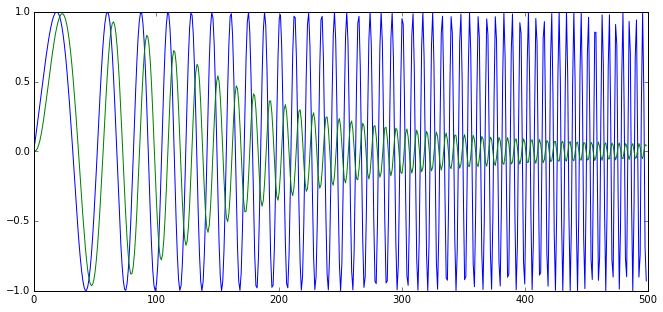

In [10]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
ax.plot(signal)
ax.plot(output)

In [11]:
class Filter(object):
    
    def __init__(self, numerator, denominator):
        self.numerator = array(numerator)
        self.denominator = array(denominator)
        self.inputs = zeros((len(numerator),))
        self.outputs = zeros((len(denominator) - 1,))
        
    def f(self, value):
        self.inputs[1:] = self.inputs[:-1]
        self.inputs[0] = value
        output = sum(self.numerator * self.inputs) - sum(self.denominator[1:] * self.outputs)
        output /= self.denominator[0]
        self.outputs[1:] = self.outputs[:-1]
        self.outputs[0] = output
        return output

In [12]:
filt = Filter(numerator, denominator)
output = zeros(signal.shape)
for i, y in enumerate(signal):
    output[i] = filt.f(y)

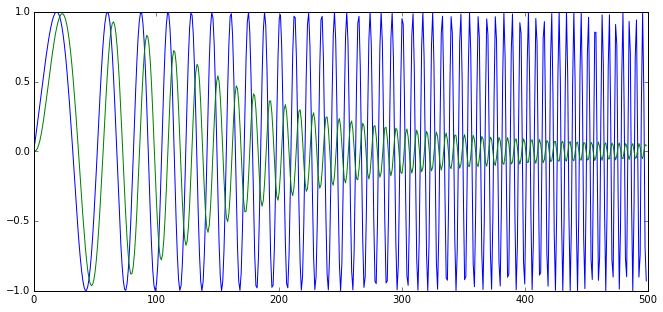

In [13]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
ax.plot(signal)
ax.plot(output)

In [48]:
class Filter(object):  # works too...
    
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        self.inputs = []
        self.outputs = []
        
    def f(self, value):
        # put value into inputs queue
        self.inputs.insert(0, value)
        if len(self.inputs) > len(self.numerator):
            self.inputs.pop()
        # perform inner product
        output = 0.
        output += sum([coeff * val for val, coeff in zip(self.inputs, self.numerator)], 0.)
        output -= sum([coeff * val for val, coeff in zip(self.outputs, self.denominator[1:])], 0.)
        # put output into outputs queue
        self.outputs.insert(0, output)
        if len(self.outputs) > len(self.denominator[1:]):
            self.outputs.pop()
        return output